In [182]:
#Rahevin Potter-Clark
#With collaboration with 
#Alexandria LeClerc, Mason Stokes, and Nathan Stark

import numpy as npy
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sklearn import tree
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

ctrain = npy.load('ctrain.npy')
ctest = npy.load('ctest.npy')
seed_data = npy.load('seed_data.npy')


<function matplotlib.pyplot.show(*args, **kw)>

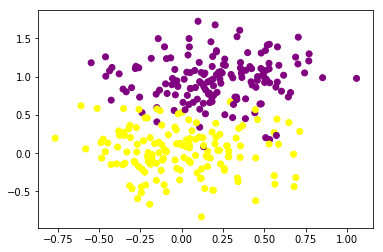

In [188]:
#problem 1) create a 2d scatter plot of ctrain, mark/color the dots by class.
#can we visualize the class boundary? do they appear separable or will
#a bayes classifier alway have errors?

trainx = ctrain[:,0] #x cordinates
trainy = ctrain[:,1] #the y cordinates
trainxy = ctrain[:,:2]
trainlabel = ctrain[:,2] #the labels

testxy = ctest[:,:2] #x, y cordinates
testlabel = ctest[:,2] #the labels

color = ['yellow' if l == 0 else 'purple' for l in trainlabel] #colors the scatter plot

plt.scatter(trainx, trainy, color=color) #plot the data
plt.show

##As we can see the boundaries between the two classes in nonlinear


In [123]:
#Problem 2) use Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() #create our Gaussian
model.fit(ctrain[:,:2], trainlabel) #fit it to our new model, with xycordinates, and labels

#rng = npy.random.RandomState(0)
#Xnew = [-1, -.75] + [2, 2] * rng.rand(300,2)
#ynew = model.predict(Xnew)

GaussianNB(priors=None)

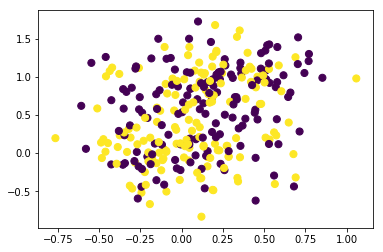

In [124]:
#Problem 3) produce a scatterplot showing the observations marked or colored
#by predicted class

#plt.scatter(ctrain[:, 0], ctrain[:,1], c=trainlabel, s=50, cmap='RdBu');
#lim = plt.axis()
#plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
#plt.axis(lim);

predic = model.predict(testxy) #create a prediction with out model

plt.show()
plt.scatter(trainx, trainy, c=predic, s=50) #plot it, having c be our predictions

Classification Report: 

             precision    recall  f1-score   support

    class 0       0.44      0.43      0.43       150
    class 1       0.44      0.45      0.44       150

avg / total       0.44      0.44      0.44       300
 

Metric Roc Curve: 



Text(0.5,0,'False Positive Rate')

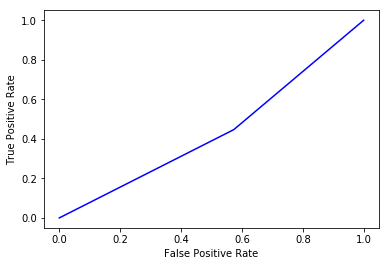

In [128]:
#Problem 4) Calculate the precision, recall, and receiver operating curve
#for your classifier
#metrics.classification_report() metrics.roc_curve()
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

print('Classification Report: \n')
target_names = ['class 0', 'class 1'] #there are two labels in our data, 0 and 1, thus class 0 & 1
print(classification_report(trainlabel, predic, target_names=target_names), '\n') #put our labels, and predict through
#classification report, having our target names = itself

print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(trainlabel, predic) #fpr = false positive, tpr = true positive, threshold self explanitory
roc_auc = auc(fpr, tpr) # we now put it through an auc for our roc_auc

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc) #plotting the fpr, tpr, and determine if its more false or true
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")


In [130]:
#Problem 5

print(classification_report(testlabel, predic, target_names=target_names)) #now we do this with our testlabels

#the resulting data is closer to 1, which means it is more accurate
#than the previous predictions

             precision    recall  f1-score   support

    class 0       0.97      0.95      0.96       150
    class 1       0.95      0.97      0.96       150

avg / total       0.96      0.96      0.96       300



In [134]:
#Problem 6

k1 = KNeighborsClassifier(n_neighbors=1) #we create our neighbors to have n degrees
k3 = KNeighborsClassifier(n_neighbors=3)
k7 = KNeighborsClassifier(n_neighbors=7)

k1 = k1.fit(ctrain[:,:2], trainlabel)#fit the data to our neighbors that we created
k3 = k3.fit(ctrain[:,:2], trainlabel)
k7 = k7.fit(ctrain[:,:2], trainlabel)

             precision    recall  f1-score   support

    class 0       0.45      0.45      0.45       150
    class 1       0.45      0.45      0.45       150

avg / total       0.45      0.45      0.45       300

Metric Roc Curve: 



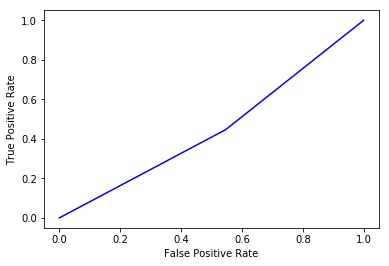

             precision    recall  f1-score   support

    class 0       0.44      0.45      0.45       150
    class 1       0.44      0.43      0.44       150

avg / total       0.44      0.44      0.44       300

Metric Roc Curve: 



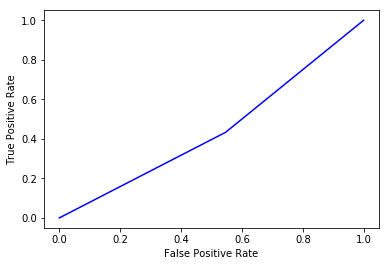

             precision    recall  f1-score   support

    class 0       0.43      0.43      0.43       150
    class 1       0.43      0.43      0.43       150

avg / total       0.43      0.43      0.43       300

Metric Roc Curve: 



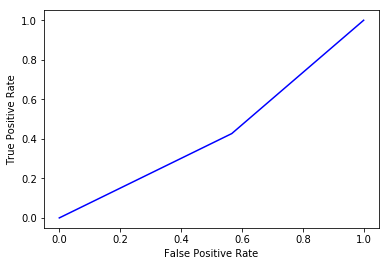

In [148]:
#Problem 7

predic1 = k1.predict(testxy) #now we predict our testxy, with the neighbors created
predic3 = k3.predict(testxy)
predic7 = k7.predict(testxy)


#### with neighbors of 1  ###
print(classification_report(trainlabel, predic1, target_names=target_names))#run the classification report like last time
print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(trainlabel, predic1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.show()
#### with neighbors of 3 ####
print(classification_report(trainlabel, predic3, target_names=target_names))
print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(trainlabel, predic3)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.show()
#### with neighbors of 7 ####
print(classification_report(trainlabel, predic7, target_names=target_names))

print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(trainlabel, predic7)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.show()

In [136]:
#Problem 8

print(classification_report(testlabel, predic1, target_names=target_names)) #now we are classification our test labels with our predictions
print(classification_report(testlabel, predic3, target_names=target_names))
print(classification_report(testlabel, predic7, target_names=target_names))

##it appears the results of the test data is 
#better with the k = 7 classifiers

             precision    recall  f1-score   support

    class 0       0.93      0.94      0.94       150
    class 1       0.94      0.93      0.94       150

avg / total       0.94      0.94      0.94       300

             precision    recall  f1-score   support

    class 0       0.93      0.95      0.94       150
    class 1       0.95      0.93      0.94       150

avg / total       0.94      0.94      0.94       300

             precision    recall  f1-score   support

    class 0       0.95      0.95      0.95       150
    class 1       0.95      0.95      0.95       150

avg / total       0.95      0.95      0.95       300



In [184]:
#Problem 9

tree1 = tree.DecisionTreeClassifier(max_depth=3) #creating a tree with max depth of 3
tree1 = tree1.fit(ctrain[:,:2], trainlabel) #fitting the data we want in the tree

tree2 = tree.DecisionTreeClassifier() #creating a tree with no max depth
tree2 = tree2.fit(ctrain[:,:2], trainlabel) #fitting the same data


Tree with Depth of 3

             precision    recall  f1-score   support

    class 0       0.98      0.93      0.96       150
    class 1       0.94      0.98      0.96       150

avg / total       0.96      0.96      0.96       300

Metric Roc Curve: 



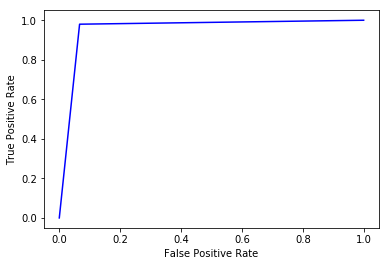

Tree with no limit to tree depth

             precision    recall  f1-score   support

    class 0       0.93      0.94      0.93       150
    class 1       0.94      0.93      0.93       150

avg / total       0.93      0.93      0.93       300

Metric Roc Curve: 



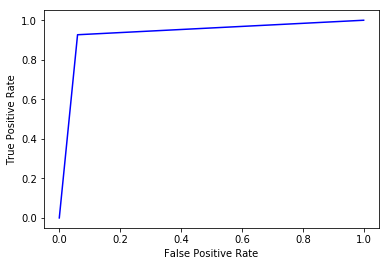

In [191]:
#Problem 10

#### with depth of 3 tree data ###
print('Tree with Depth of 3\n') 
tree1 = tree1.predict(testxy)#we need to set our tree1 to be the prediction of testxy

#this is the same as #7 but with tree data instead
print(classification_report(testlabel, tree1, target_names=target_names)) ## this is where put our tree1 data
print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(testlabel, tree1) ### this is also where we add our tree1 data
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.show()

#### with no max depth tree data ###
print('Tree with no limit to tree depth\n')
tree2 = tree2.predict(testxy) #we need to set our tree2 data to be the prediction of testxy
print(classification_report(testlabel, tree2, target_names=target_names)) ## tree2 data
print('Metric Roc Curve: \n')
fpr, tpr, thresholds = roc_curve(testlabel, tree2)## tree2 data
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label='Auc = %0.2f'% roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")
plt.show()


In [162]:
#Problem 11
print('Here is with tree of depth 3 \n')
print(classification_report(testlabel, tree1, target_names=target_names),'\n') #now we are classification our test labels with our predictions
print('Here is with the tree of no limit depth\n')
print(classification_report(testlabel, tree2, target_names=target_names))

##Scores match that of the trainning data *see problem 10 results

Here is with tree of depth 3 

             precision    recall  f1-score   support

    class 0       0.98      0.93      0.96       150
    class 1       0.94      0.98      0.96       150

avg / total       0.96      0.96      0.96       300
 

Here is with the tree of no limit depth

             precision    recall  f1-score   support

    class 0       0.93      0.94      0.93       150
    class 1       0.94      0.93      0.93       150

avg / total       0.93      0.93      0.93       300



In [205]:
#Problem 12

seeddata = seed_data[:,:7]
seedlabel = seed_data[:,7] 

seedModel = GaussianNB()
seedModel.fit(seeddata, seedlabel)

n3 = KNeighborsClassifier(n_neighbors=3)
n7 = KNeighborsClassifier(n_neighbors=7)
n3.fit(seeddata, seedlabel)
n7.fit(seeddata, seedlabel)

tree3 = tree.DecisionTreeClassifier(max_depth=3)
tree4 = tree.DecisionTreeClassifier(max_depth=2)
tree3.fit(seeddata, seedlabel)
tree4.fit(seeddata, seedlabel)
seed_names= ['class 1', 'class 2','class 3']
modelPred = seedModel.predict(seeddata)
print('Naive Bayes \n',classification_report(seedlabel, modelPred, target_names=seed_names),'\n')
n3pred = n3.predict(seeddata)
print('\n kNN with k=3 \n',classification_report(seedlabel, n3pred, target_names=seed_names),'\n')
n7pred = n7.predict(seeddata)
print('\n kNN with k=7 \n',classification_report(seedlabel, n7pred, target_names=seed_names),'\n')
tree3pred = tree3.predict(seeddata)
print('\n DTC with depth 3 \n',classification_report(seedlabel, tree3pred, target_names=seed_names),'\n')
tree4pred = tree4.predict(seeddata)
print('\n DTC with depth 2',classification_report(seedlabel, tree4pred, target_names=seed_names),'\n')


Naive Bayes 
              precision    recall  f1-score   support

    class 1       0.88      0.84      0.86        70
    class 2       0.96      0.93      0.94        70
    class 3       0.89      0.96      0.92        70

avg / total       0.91      0.91      0.91       210
 


 kNN with k=3 
              precision    recall  f1-score   support

    class 1       0.97      0.93      0.95        70
    class 2       1.00      0.97      0.99        70
    class 3       0.93      1.00      0.97        70

avg / total       0.97      0.97      0.97       210
 


 kNN with k=7 
              precision    recall  f1-score   support

    class 1       0.92      0.83      0.87        70
    class 2       0.96      0.96      0.96        70
    class 3       0.88      0.97      0.93        70

avg / total       0.92      0.92      0.92       210
 


 DTC with depth 3 
              precision    recall  f1-score   support

    class 1       0.95      0.90      0.93        70
    class 2   

In [210]:
#Problem 13

from sklearn.metrics import confusion_matrix

print('Naive Bayes \n',confusion_matrix(seedlabel, modelPred))

print('\n kNN with k=3 \n',confusion_matrix(seedlabel, n3pred))

print('\n kNN with k=7 \n',confusion_matrix(seedlabel, n7pred))

print('\n DTC with depth 3 \n',confusion_matrix(seedlabel, tree3pred))

print('\n DTC with depth 2 \n',confusion_matrix(seedlabel, tree4pred))

##I would be at roughly 85%- 90% confident that the best performing classifier
##would hold up on new test data

Naive Bayes 
 [[59  3  8]
 [ 5 65  0]
 [ 3  0 67]]

 kNN with k=3 
 [[65  0  5]
 [ 2 68  0]
 [ 0  0 70]]

 kNN with k=7 
 [[58  3  9]
 [ 3 67  0]
 [ 2  0 68]]

 DTC with depth 3 
 [[63  0  7]
 [ 2 68  0]
 [ 1  0 69]]

 DTC with depth 2 
 [[55  1 14]
 [ 2 68  0]
 [ 0  0 70]]
